In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit, least_squares

save_path = r'/home/luan/Documentos/figuras_pesquisa/IC_Chemical_Potential/'

In [17]:
fn = ['N10', 'N20', 'N40', 'N60', 'N100']
fn_prefixo = 'DMRG/U5'
fn_posfixo = '_Track3.csv'

Ns = np.array([10, 20, 40, 60, 100])
d = ''
for digito in fn_prefixo:
    if digito.isnumeric() == True:
        d += digito

U = float(d)


mus = []
Egs = []
Egsm2 = []
Egsp2 = []
Np = []
xs = []
for i in range(len(fn)):
    filenames = fn_prefixo + fn[i] + fn_posfixo
    print(filenames)
    df = pd.read_csv(filenames)
    
    x = np.array(df['Onsite_Energy'])

    xs.append(x)

    mus.append(np.array(df['Chemical_Potential']))
    Egs.append(np.array(df['E1']))
    Egsm2.append(np.array(df['E1m2']))
    Egsp2.append(np.array(df['E1p2']))
    try:
        Np.append(np.array(df['N_particles']))
    except:
        Np.append(np.array(df['Nparticles']))
    
#mus = np.array(mus)
#Egs = np.array(Egs)
#Egsm2 = np.array(Egsm2)
#Egsp2 = np.array(Egsp2)
#Np = np.array(Np)
#xs = np.array(xs)

DMRG/U5N10_Track3.csv
DMRG/U5N20_Track3.csv
DMRG/U5N40_Track3.csv
DMRG/U5N60_Track3.csv
DMRG/U5N100_Track3.csv


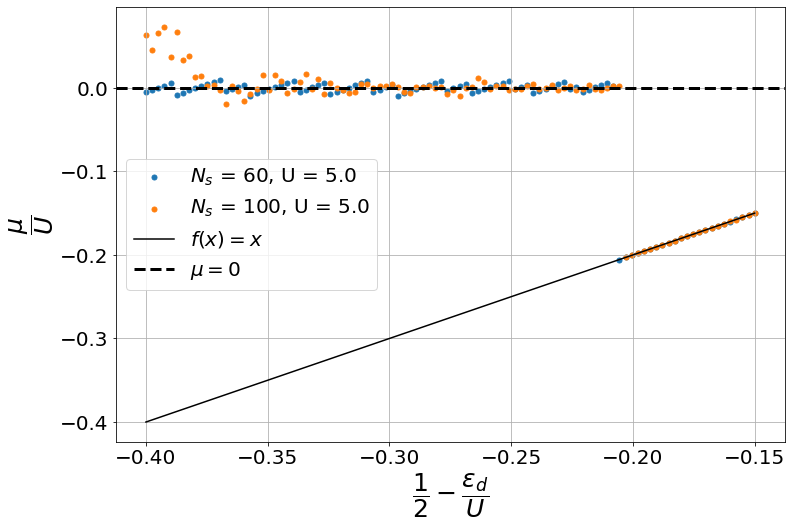

In [18]:
with plt.rc_context({'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
    fig = plt.figure(figsize = (12, 8))

    for i in range(3, len(mus)):
        plt.scatter(0.5-xs[i]/U, mus[i]/U, label = r'$N_s$ = ' + f'{Ns[i]}' + f', U = {U}', s = 25)
        
    plt.plot(0.5-xs[i]/U, 0.5-xs[i]/U, color = 'black', label = r'$f(x) = x$')
    plt.axhline(y = 0, linestyle = 'dashed', c = 'black', linewidth = 3, label = r'$\mu = 0$')

    plt.xlabel(r'$\dfrac{1}{2} - \dfrac{\epsilon_d}{U}$', fontsize = 25)
    plt.ylabel(r'$\dfrac{\mu}{U}$', fontsize = 25)
    plt.tick_params(labelsize = 20)

    plt.grid(visible = True)

    plt.legend(loc = 'center left', fontsize = 20)

#plt.savefig(save_path + 'ChemPotNs60100U5.png', format = 'png', bbox_inches = 'tight')

plt.show()

In [19]:
#for i in range()
ChargeGap = []

for i in range(len(xs)):
    ChargeGap.append((np.array(Egsm2[i]) + np.array(Egsp2[i]) - 2*np.array(Egs[i]))/2)

#ChargeGap = (Egsm2 + Egsp2 - 2*Egs)/2

#plt.scatter(U/2 - xs[i], ChargeGap[i])

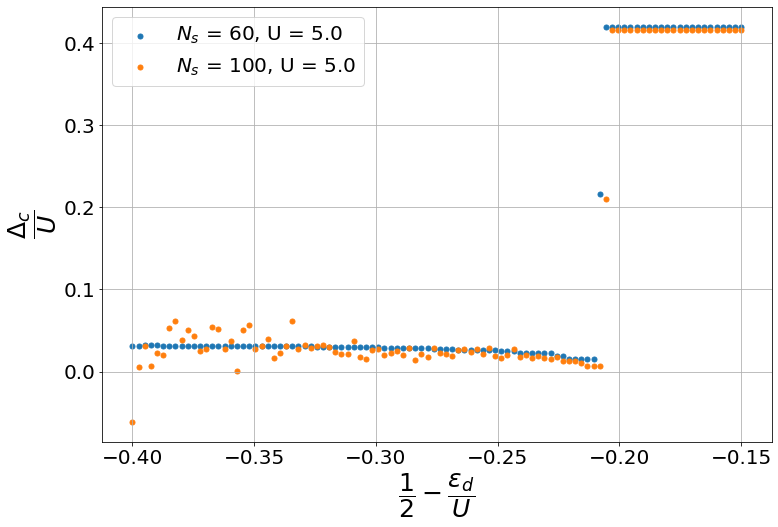

In [20]:
with plt.rc_context({'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
    fig = plt.figure(figsize = (12, 8))

    for i in range(3, len(mus)):
        plt.scatter(0.5-xs[i]/U, ChargeGap[i]/U, label = r'$N_s$ = ' + f'{Ns[i]}' + f', U = {U}', s = 25)

    plt.xlabel(r'$\dfrac{1}{2} - \dfrac{\epsilon_d}{U}$', fontsize = 25)
    plt.ylabel(r'$\dfrac{\Delta_c}{U}$', fontsize = 25)
    plt.tick_params(labelsize = 20)

    plt.grid(visible = True)

    plt.legend(loc = 'upper left', fontsize = 20)

#plt.savefig(save_path + 'ChargeGapNs60100U5.png', format = 'png', bbox_inches = 'tight')

plt.show()

In [21]:
def fit_func(x, A, B, C):
    return B*(x**C) + A

0.0038911576203769635
[-0.00952915  2.07877043  1.07459417]


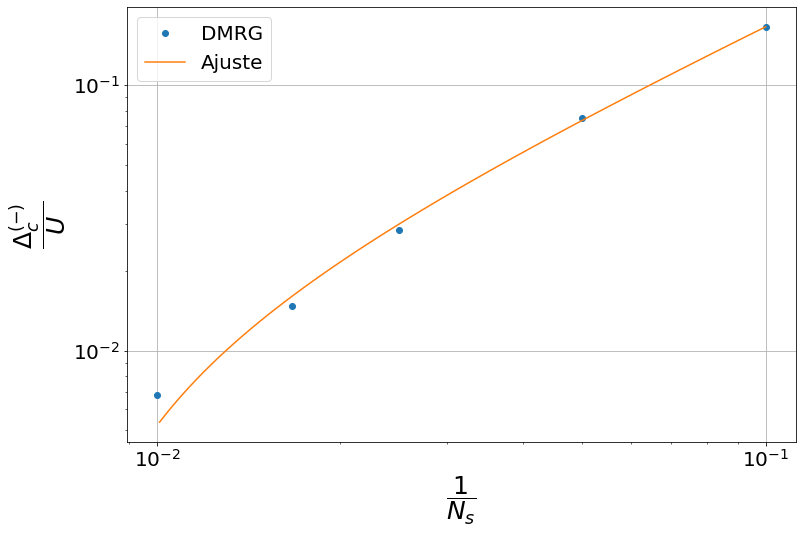

In [ ]:
xaux = np.arange(10, 100, 1)

edc = []
CGc = []
for j in range(len(xs)):
    for i in range(len(xs[j])-1):
        if np.array(ChargeGap[j][i+1]) - np.array(ChargeGap[j][i]) > U/10 and ChargeGap[j][i] < U/5:
            edc.append(xs[j][i])
            CGc.append(ChargeGap[j][i])

edc = np.array(edc)
CGc = np.array(CGc)/U

Nsinv = np.array([1/10, 1/20, 1/40, 1/60, 1/100])

CGclog = np.log10(CGc)
Nsinvlog = np.log10(Nsinv)

#params = np.polyfit(Nsinvlog, CGclog[:len(Nsinv)], 1)
params, cov = curve_fit(fit_func, Nsinv[:len(Nsinv)-0], CGc[:len(Nsinv)-0])
with plt.rc_context({'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
    fig = plt.figure(figsize = (12, 8))

    #plt.scatter(Nsinv, CGc[:len(Nsinv)])

    plt.loglog(Nsinv[:len(Nsinv)], CGc[:len(Nsinv)], 'o', label = 'DMRG')
    plt.plot(1/xaux, fit_func(1/xaux, *params), label = 'Ajuste')

    plt.xlabel('$\dfrac{1}{N_s}$', fontsize = 25)
    plt.ylabel('$\dfrac{\Delta_{c}^{(-)}}{U}$', fontsize = 25)
    plt.tick_params(labelsize = 20)

    plt.legend(loc = 'upper left', fontsize = 20)
    plt.grid(visible = True)

#plt.savefig(save_path + 'ChargeGapScalingU10.png', format = 'png', bbox_inches = 'tight')

print(np.sqrt(cov[0, 0]))

#U = 10
#A = 2.92e-4 pm 02.2e-3
#B = 2.50
#C = 1.49

#U = 5
#A = -9.53e-3 pm 3.9e-3
#B = 2.10
#C = 1.07

print(params)

[3.51017629 3.61649408 1.15234549]


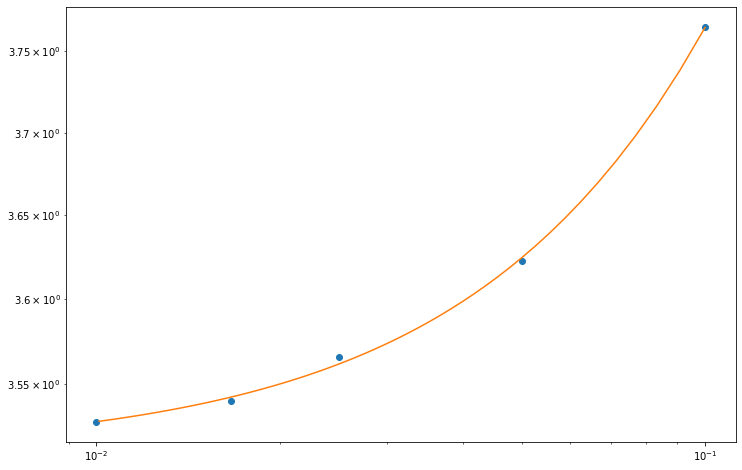

In [23]:
edc2 = []
for j in range(len(xs)):
    for i in range(len(xs[j])-1):
        if np.abs(mus[j][i+1] - mus[j][i]) > 0.1*U:
            edc2.append(xs[j][i])

edc2 = np.array(edc2)

params1, _ = curve_fit(fit_func, Nsinv, edc2[:len(Nsinv)])

fig = plt.figure(figsize = (12, 8))

plt.loglog(Nsinv, edc2[:len(Nsinv)], 'o')
plt.plot(1/xaux, fit_func(1/xaux, *params1))


print(params1)

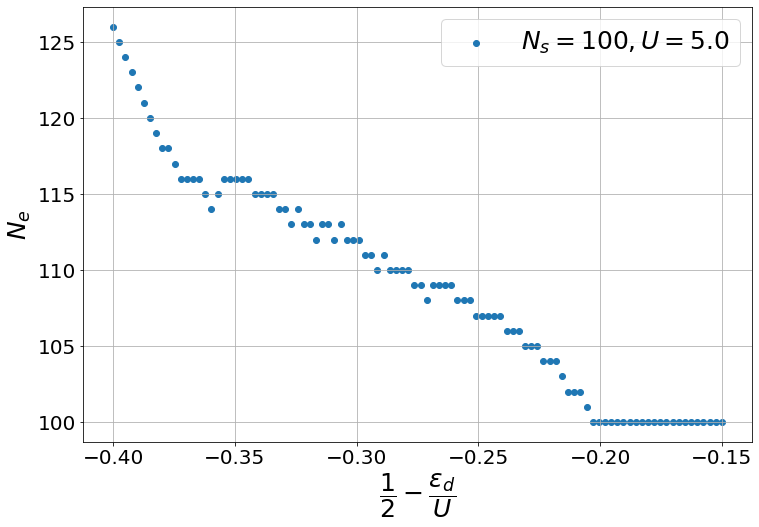

In [24]:
with plt.rc_context({'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
    plt.figure(figsize = (12, 8))
    plt.scatter(1/2 - xs[-1]/U, Np[-1], label = f'$N_s = 100, U = {U}$')

    plt.xlabel(r'$\dfrac{1}{2} - \dfrac{\epsilon_d}{U}$', fontsize = 25)
    plt.ylabel(r'$N_e$', fontsize = 25)
    plt.tick_params(labelsize = 20)

    plt.legend(loc = 'upper right', fontsize = 25)

    plt.grid(visible = True)


#plt.savefig(save_path+'EscadinhaU10N100.png', format = 'png', bbox_inches = 'tight')


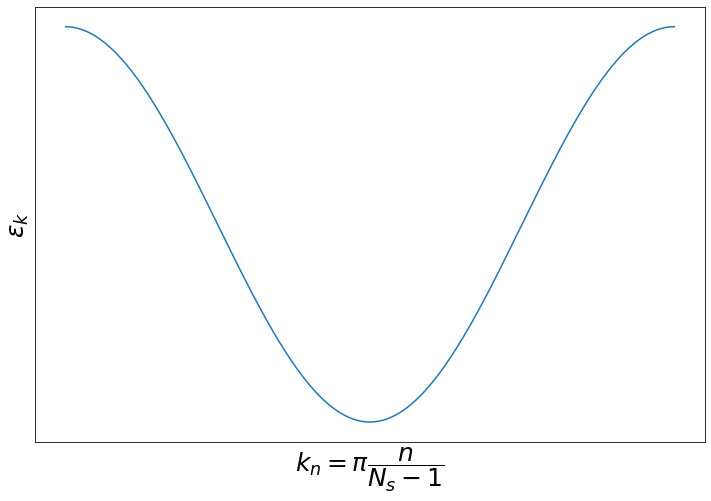

In [25]:
u = 10
mu_ = 0
x_ = np.arange(-np.pi, np.pi, 0.02)

eta = 0.05

nmean = -1 -2*np.cos(x_)

with plt.rc_context({'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
    plt.figure(figsize = (12, 8))
    plt.plot(1/2 - x_/u, nmean)

    #plt.text(0.7, 0.75, 'Fase 1', fontsize = 25)
    #plt.text(0.25, 0.3, 'Fase 2', fontsize = 25, color = 'white')

    plt.xlabel(r'$k_n = \pi\dfrac{n}{N_s-1}$', fontsize = 25)
    plt.ylabel(r'$\epsilon_k$', fontsize = 25)
    plt.xticks([])
    plt.yticks([])
    #plt.grid(visible = True)

plt.savefig(save_path+'LimiteMetalico.png', format = 'png', bbox_inches = 'tight')


/tmp/ipykernel_4982/627683065.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Egs_arr = np.array(Egs)
/tmp/ipykernel_4982/627683065.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Egsm2_arr = np.array(Egsm2)
/tmp/ipykernel_4982/627683065.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Egsp2_arr = np.array(Egsp2)
/tmp/ipy

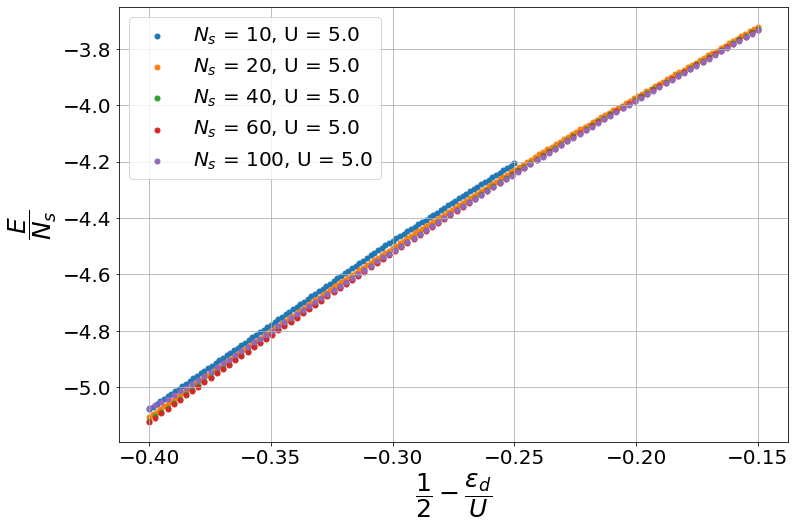

In [26]:
Egs_arr = np.array(Egs)
Egsm2_arr = np.array(Egsm2)
Egsp2_arr = np.array(Egsp2)
xs_arr = np.array(xs)

with plt.rc_context({'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
    fig = plt.figure(figsize = (12, 8))

    for i in range(0, len(mus)):
        plt.scatter(0.5-xs_arr[i]/U, Egs_arr[i]/Ns[i], label = r'$N_s$ = ' + f'{Ns[i]}' + f', U = {U}', s = 25)
        #plt.scatter(0.5-xs[i]/U, Egsm2[i]/Ns[i], label = r'$N_s$ = ' + f'{Ns[i]}' + f', U = {U}', s = 25)
        #plt.scatter(0.5-xs[i]/U, Egsp2[i]/Ns[i], label = r'$N_s$ = ' + f'{Ns[i]}' + f', U = {U}', s = 25)

    plt.xlabel(r'$\dfrac{1}{2} - \dfrac{\epsilon_d}{U}$', fontsize = 25)
    plt.ylabel(r'$\dfrac{E}{N_s}$', fontsize = 25)
    plt.tick_params(labelsize = 20)

    plt.grid(visible = True)

    plt.legend(loc = 'upper left', fontsize = 20)

In [27]:
plt.scatter(Nsinv, Egs_arr[:, -1]/Ns)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [13]:
def FiniteSize(X, Y, p0):
    X = np.array(X)
    Y = np.array(Y)
    params, cov = curve_fit(fit_func, X, Y, p0 = p0)
    return params, cov

1.0710056448990812


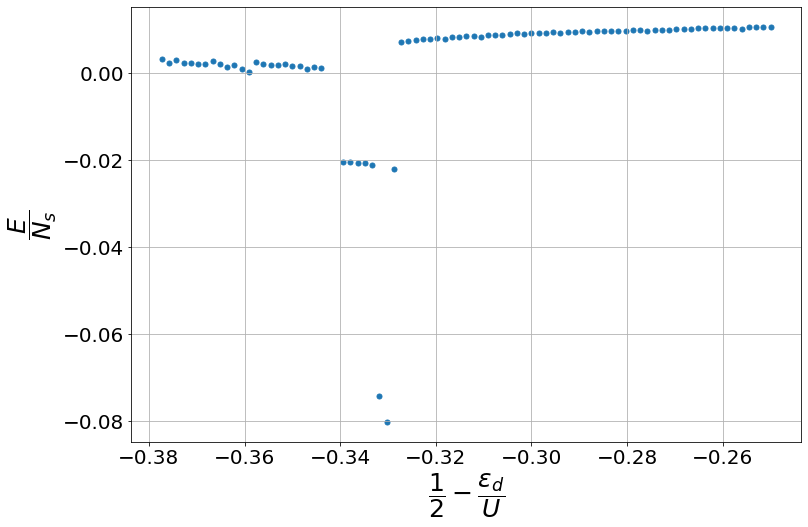

In [ ]:

Egs_scaled = []
Egsm2_scaled = []
Egsp2_scaled = []
xs_scaled = []
xsm2_scaled = []
xsp2_scaled = []
for i in range(len(xs[0])):
    try:
        params_gs, _ = FiniteSize(Nsinv, Egs_arr[:, i]/Ns, [-7, 10, 1.5])
        params_gsm2, _ = FiniteSize(Nsinv, Egsm2_arr[:, i]/Ns, [-7, 10, 1.5])
        params_gsp2, _ = FiniteSize(Nsinv, Egsp2_arr[:, i]/Ns, [-7, 10, 1.5])

        xs_scaled.append(xs_arr[0, i])
        Egs_scaled.append(params_gs[0])

        xsm2_scaled.append(xs_arr[0, i])
        Egsm2_scaled.append(params_gsm2[0])

        xsp2_scaled.append(xs_arr[0, i])
        Egsp2_scaled.append(params_gsp2[0])
    except:
        pass

Egs_scaled_arr = np.array(Egs_scaled)
Egsm2_scaled_arr = np.array(Egsm2_scaled)
Egsp2_scaled_arr = np.array(Egsp2_scaled)

Delta = (Egsm2_scaled_arr + Egsp2_scaled_arr - 2*Egs_scaled_arr)/2

print(100*np.max(Delta))

with plt.rc_context({'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
    fig = plt.figure(figsize = (12, 8))

    #for i in range(0, len(mus)):
    plt.scatter(0.5-np.array(xs_scaled)/U, Delta, label = f', U = {U}', s = 25)

        #plt.scatter(0.5-xs[i]/U, Egsm2[i]/Ns[i], label = r'$N_s$ = ' + f'{Ns[i]}' + f', U = {U}', s = 25)
        #plt.scatter(0.5-xs[i]/U, Egsp2[i]/Ns[i], label = r'$N_s$ = ' + f'{Ns[i]}' + f', U = {U}', s = 25)

    plt.xlabel(r'$\dfrac{1}{2} - \dfrac{\epsilon_d}{U}$', fontsize = 25)
    plt.ylabel(r'$\dfrac{E}{N_s}$', fontsize = 25)
    plt.tick_params(labelsize = 20)

    plt.grid(visible = True)